# Personal preprocessing
* product_category
* product_subcategory 
* product_modelname 

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("../train.csv") # 학습용 데이터
df_test = pd.read_csv("../submission.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)

(59299, 5271)

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [38]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)


## 결과

In [39]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

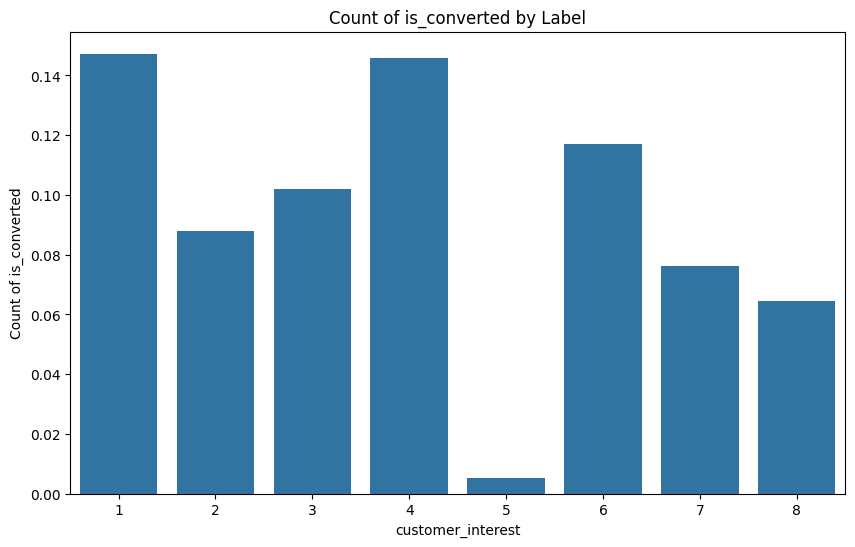

In [40]:
label_converted_count = df_train.groupby('customer_interest')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_interest', y='is_converted', data=label_converted_count)
plt.xlabel('customer_interest')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()

## product_category 정리
* LG BTB 마케팅의 입력 양식을 참고
* 종류

In [41]:
data =  df_train[['product_category', 'is_converted']]
data['product_category'].value_counts()

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [42]:
data = data.fillna('Unknown')

In [43]:
def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [44]:
data['product_category'] = data['product_category'].str.lower().str.strip()
data['product_category'].value_counts()

product_category
unknown                                                                                                 19374
interactive digital board                                                                                6154
vrf                                                                                                      5640
multi-split                                                                                              3674
video wall signage                                                                                       2029
etc.                                                                                                     2018
led signage                                                                                              1895
interactive signage                                                                                      1862
single-split                                                                                           

In [36]:
df_train[df_train['product_category'] == 'rac'][['customer_country','product_category', 'product_subcategory', 'product_modelname']]

,customer_country,product_category,product_subcategory,product_modelname
25,/KANPUR/India,rac,NaN,NaN
33,/Bauan Batangas/Philippines,rac,NaN,NaN
39,/Bangalore/India,rac,NaN,NaN
43,/Badarpur/India,rac,NaN,NaN
66,/Tema/Ghana,rac,NaN,NaN
67,/LAGOS/Nigeria,rac,NaN,NaN
80,/Porbandar/India,rac,NaN,NaN
82,/Ahmedabad/India,rac,NaN,NaN
93,/Dubai/U.A.E,rac,NaN,NaN
136,/TRICHUR/India,rac,NaN,NaN


* interactive signage = interactive digitalborad
* rac가 안보이니깐 일단 패스

In [45]:
data['product_category'] =  data['product_category'].replace('interactive signage', 'interactive digital board')

In [16]:
cate_dict  = {
    'interactive digital board' : 'commercial display',
    'vrf' : 'hvac',
    'multi-split' : 'hvac',
    'video wall signage': 'commercial display',
    'led signage' : 'commercial display',
    'single-split' : 'hvac',
}

subcate_dict = {
    'interactive digital board' : 'digital signage',
    'vrf' : 'vrf system',
    'multi-split' : 'multi-split',
    'video wall signage' : 'digital signage',
    'led signage' : 'led signage',
    'single-split' : 'commercial solutions',
    
}

subsubcate_dict = {
    'interactive digital board' : 'interactive',
    'video wall signage' : 'video wall',
    'single-split' : 'single-split'
}

